In [158]:
import requests
from bs4 import BeautifulSoup
import re
import pandas
import matplotlib.pyplot as plt

In [128]:
def get_soup():
    url = f"https://www.google.com/search?q=machine+learning+intern&rlz=1C1GIVA_enCA996CA996&ei=nggIY6vjBYXA7gKe_ZK4DQ&uact=5&oq=machine+learning+intern&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyCAgAEIAEEMkDMgUIABCABDIFCAAQgAQyBQgAEIAEOgcIABBHELADOgcIABCwAxBDOgQIABBDOgcIABCxAxBDOggIABCABBCxAzoLCAAQgAQQsQMQgwE6EQguEIAEELEDEIMBEMcBENEDOhAILhCxAxCDARDHARDRAxBDOgoIABCxAxCDARBDOggILhCPARDqAjoICAAQjwEQ6gI6BQgAEJECOggIABCxAxCDAToLCC4QgAQQsQMQgwE6CgguEMcBENEDEEM6CwguEIAEEMcBEK8BOggILhCxAxCDAToHCAAQyQMQQzoGCAAQChBDOgcILhCxAxBDOggIABDJAxCRAjoFCAAQkgM6DQgAELEDEIMBEMkDEEM6DggAELEDEIMBEMkDEJECOgsIABCxAxCDARCRAjoFCC4QgARKBAhBGABKBAhGGABQtAZY4yRgvChoAnABeACAAXOIAZkVkgEEMzEuM5gBAKABAbABCsgBCsABAQ&sclient=gws-wiz&ibp=htl;jobs&sa=X&ved=2ahUKEwi63MXSl-P5AhWFI30KHfh9BM0QudcGKAJ6BAgUEC4#htivrt=jobs&htidocid=WOx6rXVi--EAAAAAAAAAAA%3D%3D&fpstate=tldetail" 
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.102 Safari/537.36 Edg/104.0.1293.63'}
    r = requests.get(url, headers=headers)
    # print(url)
    # print(r) if this prints 403 then the request was blocked
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup

In [135]:
def job_grabber(soup):
    jobs = soup.find_all('span', class_ = 'HBvzbc')
    return jobs

In [136]:
jobs = job_grabber(get_soup())

In [145]:
def index_qual(words):
    i = 0
    while i < len(words):
        if 'qualification' in words[i].lower():
            return i
        else:
            i+=1
    return -1

In [148]:
qualifications = []
for job in jobs:
    words = re.split(' |\n|•', str(job))
    i = index_qual(words)
    if i >= 0:
        qualifications += words[i + 1:]

            

In [149]:
print(qualifications)

['', '', 'Suitable', 'research', 'background', 'in', 'artificial', 'intelligence;', '', '', 'Advanced', 'research', 'experience', 'in', 'deep', 'learning', 'and', 'reinforcement', 'learning', 'a', 'plus;', '', '', 'Working', 'toward', 'a', 'post-graduate', 'degree', 'with', 'a', 'concentration', 'on', 'artificial', 'intelligence,', 'robotics,', 'reinforcement', 'learning,', 'deep', 'learning,', 'or', 'related', 'field;', '', '', 'Hands-on', 'experience', 'with', 'common', 'deep', 'reinforcement', 'learning', 'algorithms', '(DQN,', 'DDPG,', 'PPO,', 'etc);', '', '', 'Exposure', 'to', 'general', 'value', 'functions', '(GVFs)', 'a', 'plus;', '', '', 'Proficiency', 'in', 'common', 'programming', 'languages', '(such', 'as', 'Python,', 'C/C++,', 'etc.);', '', '', 'Experience', 'with', 'one', 'or', 'more', 'mainstream', 'deep', 'learning', 'frameworks', 'such', 'as', 'TensorFlow,', 'Caffe,', 'MXNet,', 'Torch,', 'PyTorch', 'and', 'Keras', 'a', 'plus</span></span>', '-', 'Currently', 'enrolled',

In [188]:
def clean_word(word):
    if 'class' in word:
        return ''
    bad_words = ['a', 'in', 'and', 'on', 'plus', 'to', 'or', 'as', 'with', 'etc.', 
                 'etc', 'such', '-', 'of', 'the', 'our', 'at', 'skills', 'is', 'that', 
                'one', 'for', 'work', 'related', 'including', 'be', 
                 'more', 'full-time', 'paid']
    if word in bad_words:
        return ''
    
    bad_chars = [',', '(', ')', '</span>', ';', '.']
    for char in bad_chars:
        word = word.replace(char, '')
    return word.lower()

In [189]:
for i in range(len(qualifications)):
    qualifications[i] = clean_word(qualifications[i])
    

In [190]:
print(qualifications)

['suitable', 'research', 'background', 'artificial', 'intelligence', 'advanced', 'research', 'experience', 'deep', 'learning', 'reinforcement', 'learning', 'working', 'toward', 'post-graduate', 'degree', 'concentration', 'artificial', 'intelligence', 'robotics', 'reinforcement', 'learning', 'deep', 'learning', 'field', 'hands-on', 'experience', 'common', 'deep', 'reinforcement', 'learning', 'algorithms', 'dqn', 'ddpg', 'ppo', 'exposure', 'general', 'value', 'functions', 'gvfs', 'proficiency', 'common', 'programming', 'languages', 'python', 'c/c++', 'experience', '', 'mainstream', 'deep', 'learning', 'frameworks', 'tensorflow', 'caffe', 'mxnet', 'torch', 'pytorch', 'keras', 'currently', 'enrolled', 'university', 'ms', 'program', 'computer', 'science', 'computer', 'engineering', 'fields', 'experience', 'applying', 'deep', 'learning', 'models', 'computer', 'vision', 'natural', 'language', 'processing', 'tasks', 'experience', 'deep', 'learning', 'frameworks', 'pytorch', 'tensor', 'flow', '

In [191]:
qualifications = [i for i in qualifications if i != '']

In [204]:
import pandas as pd
df = pd.DataFrame(qualifications)


<AxesSubplot:ylabel='0'>

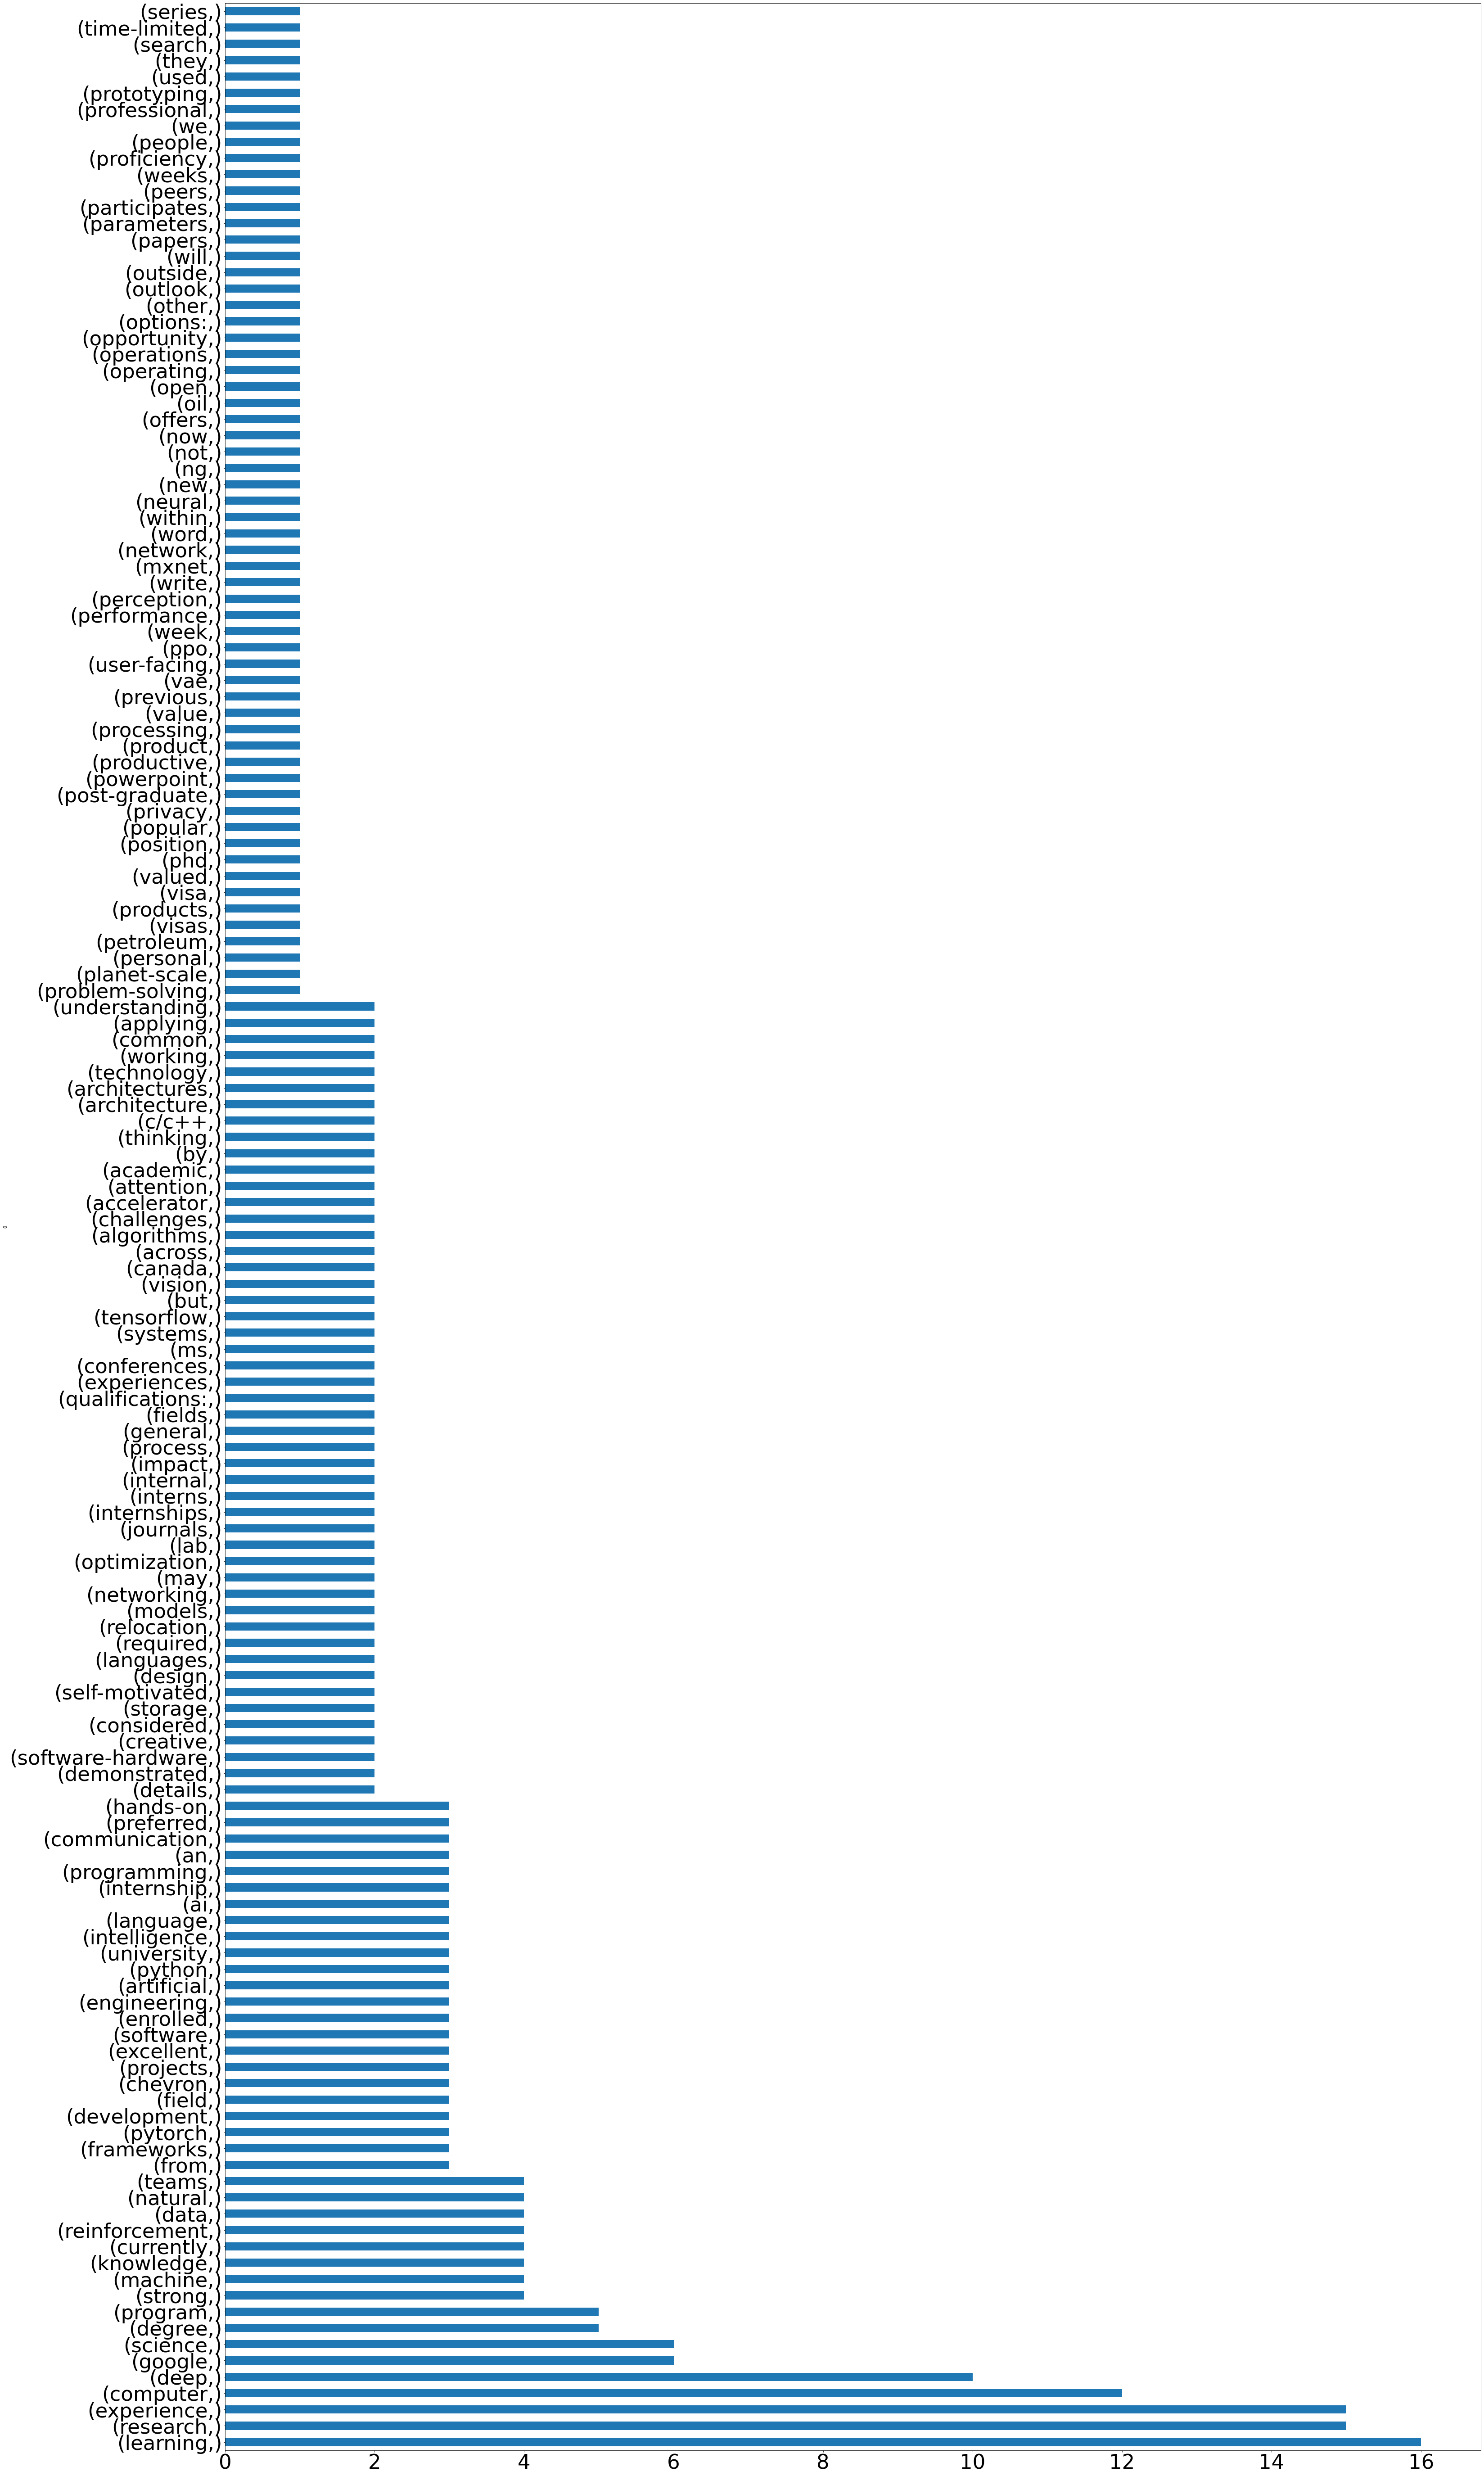

In [213]:
df.value_counts()[:150].plot(figsize=(50, 100), kind = "barh", fontsize = 45, rot=0)

Best keywords are:
    - deep learning
    - in university
    - reinforcement learning
    - nlp
    - teamwork
    - pytorch
    - communication
    - creative
    - tensorflow 
    - python
    - c
    - computer vision
    - problem solving
    - self-motivated
    - neural network
    - framework
    - machine learning